In [ ]:
import pandas as pd 
import kagglehub
import matplotlib.pyplot as plt

from fotboll_analys_python import df_former_names, df_goalscorers, df_results, df_shootouts, average_goals_first_1000, average_goals_latest_1000, summary_clean, su


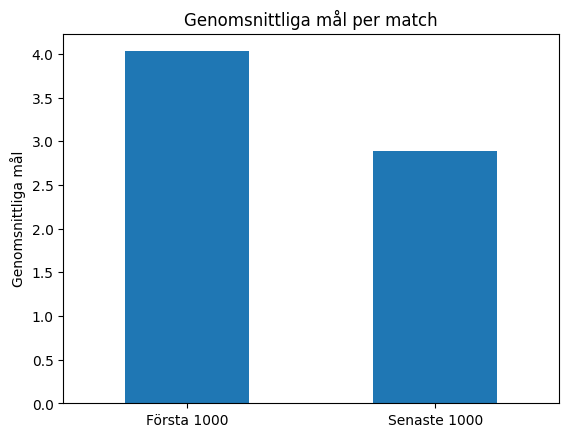

In [8]:
df = pd.DataFrame({
    "Average goals": [
        average_goals_first_1000 ,
        average_goals_latest_1000
    ]
}, index=["Första 1000", "Senaste 1000"])

df.plot(kind="bar", legend=False)
plt.ylabel("Genomsnittliga mål")
plt.title("Genomsnittliga mål per match")
plt.xticks(rotation=0)
plt.show()

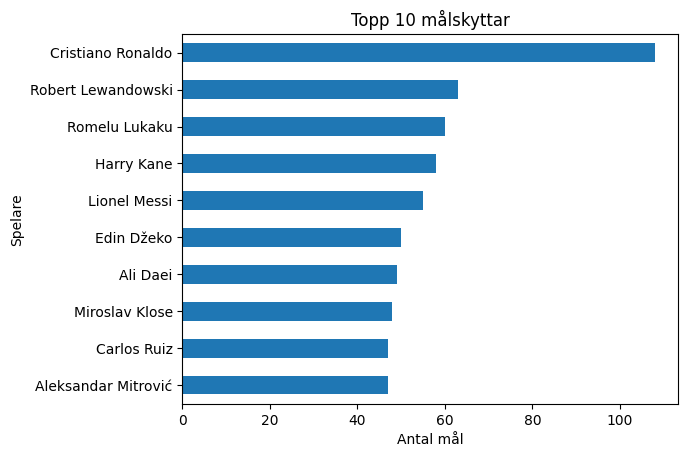

In [12]:
top_scorers = (
    df_goalscorers["scorer"]
    .dropna()
    .value_counts()
    .head(10)
)


ax = top_scorers.plot(kind="barh")
plt.gca().invert_yaxis()

plt.xlabel("Antal mål")
plt.ylabel("Spelare")
plt.title("Topp 10 målskyttar")

plt.show()



In [18]:
scorer_no_pen = df_goalscorers[df_goalscorers["penalty"] == False]

scorer_no_pen = (
    scorer_no_pen["scorer"]
    .dropna()
    .value_counts()
    .head(10)
)

print(scorer_no_pen)

scorer
Cristiano Ronaldo      89
Romelu Lukaku          54
Robert Lewandowski     50
Edin Džeko             48
Miroslav Klose         48
Aleksandar Mitrović    45
Carlos Ruiz            43
Lionel Messi           41
Ali Daei               41
Zlatan Ibrahimović     39
Name: count, dtype: int64


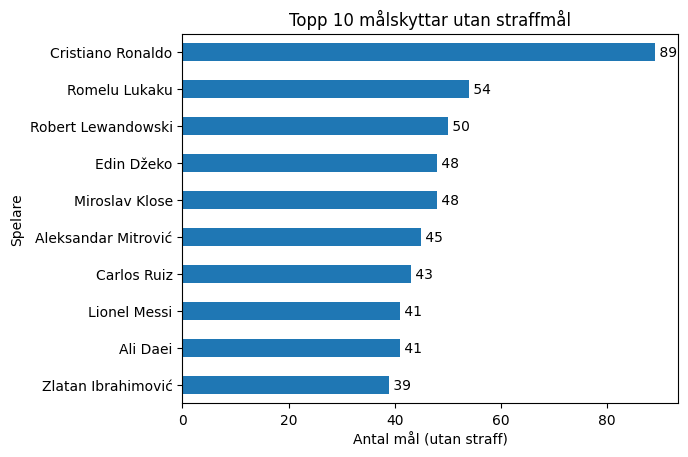

In [19]:
ax = scorer_no_pen.plot(kind="barh")
plt.gca().invert_yaxis()

plt.xlabel("Antal mål (utan straff)")
plt.ylabel("Spelare")
plt.title("Topp 10 målskyttar utan straffmål")

for i, value in enumerate(scorer_no_pen):
    ax.text(value, i, f" {value}", va="center")

plt.show()

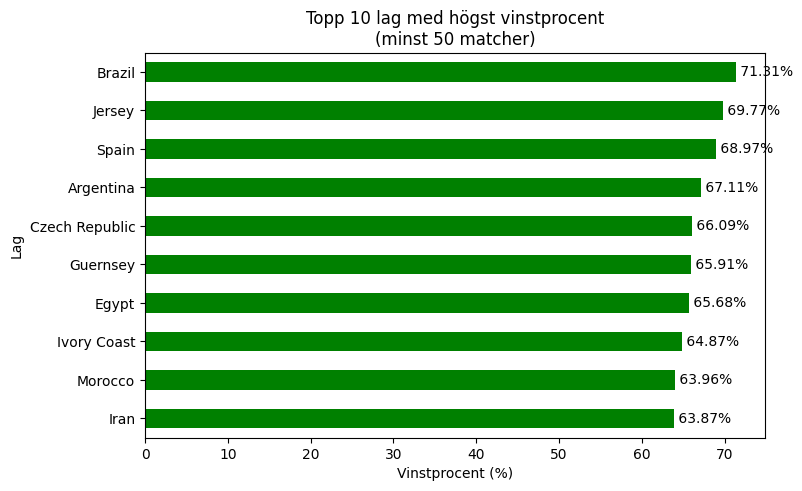

In [29]:
top10 = summary_clean.sort_values("win_percentage", ascending=False).head(10)

ax = top10.plot(
    kind="barh",
    x="team",
    y="win_percentage",
    legend=False,
    figsize=(8, 5),
    color="green"
)

plt.gca().invert_yaxis()
plt.xlabel("Vinstprocent (%)")
plt.ylabel("Lag")
plt.title("Topp 10 lag med högst vinstprocent\n(minst 50 matcher)")

# Visa procent på staplarna
for i, value in enumerate(top10["win_percentage"]):
    ax.text(value, i, f" {value}%", va="center")

plt.show()

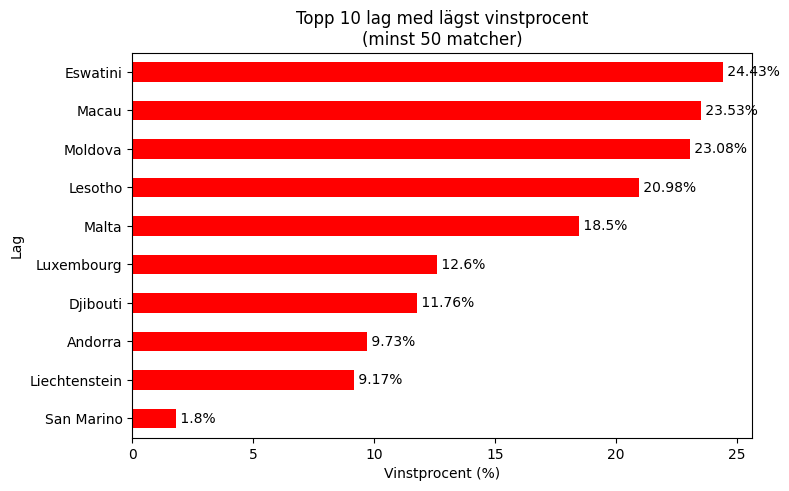

In [28]:
bot10 = summary_clean.sort_values("win_percentage", ascending=False).tail(10)

ax = bot10.plot(
    kind="barh",
    x="team",
    y="win_percentage",
    legend=False,
    figsize=(8, 5),
    color="red"
)

plt.gca().invert_yaxis()
plt.xlabel("Vinstprocent (%)")
plt.ylabel("Lag")
plt.title("Topp 10 lag med lägst vinstprocent\n(minst 50 matcher)")

# Visa procent på staplarna
for i, value in enumerate(bot10["win_percentage"]):
    ax.text(value, i, f" {value}%", va="center")

plt.show()

In [ ]:
top10_pen = summary_pen_clean.head(10)

ax = top10_pen.plot(
    kind="barh",
    y="win_percentage",
    legend=False,
    figsize=(8, 5),
    color="green"
)

plt.gca().invert_yaxis()
plt.xlabel("Vinstprocent i straffläggningar (%)")
plt.ylabel("Lag")
plt.title("Topp 10 lag i straffläggningar")

for i, value in enumerate(top10_pen["win_percentage"]):
    ax.text(value, i, f" {value}%", va="center")

plt.show()